## **Online Payments Fraud Detection**
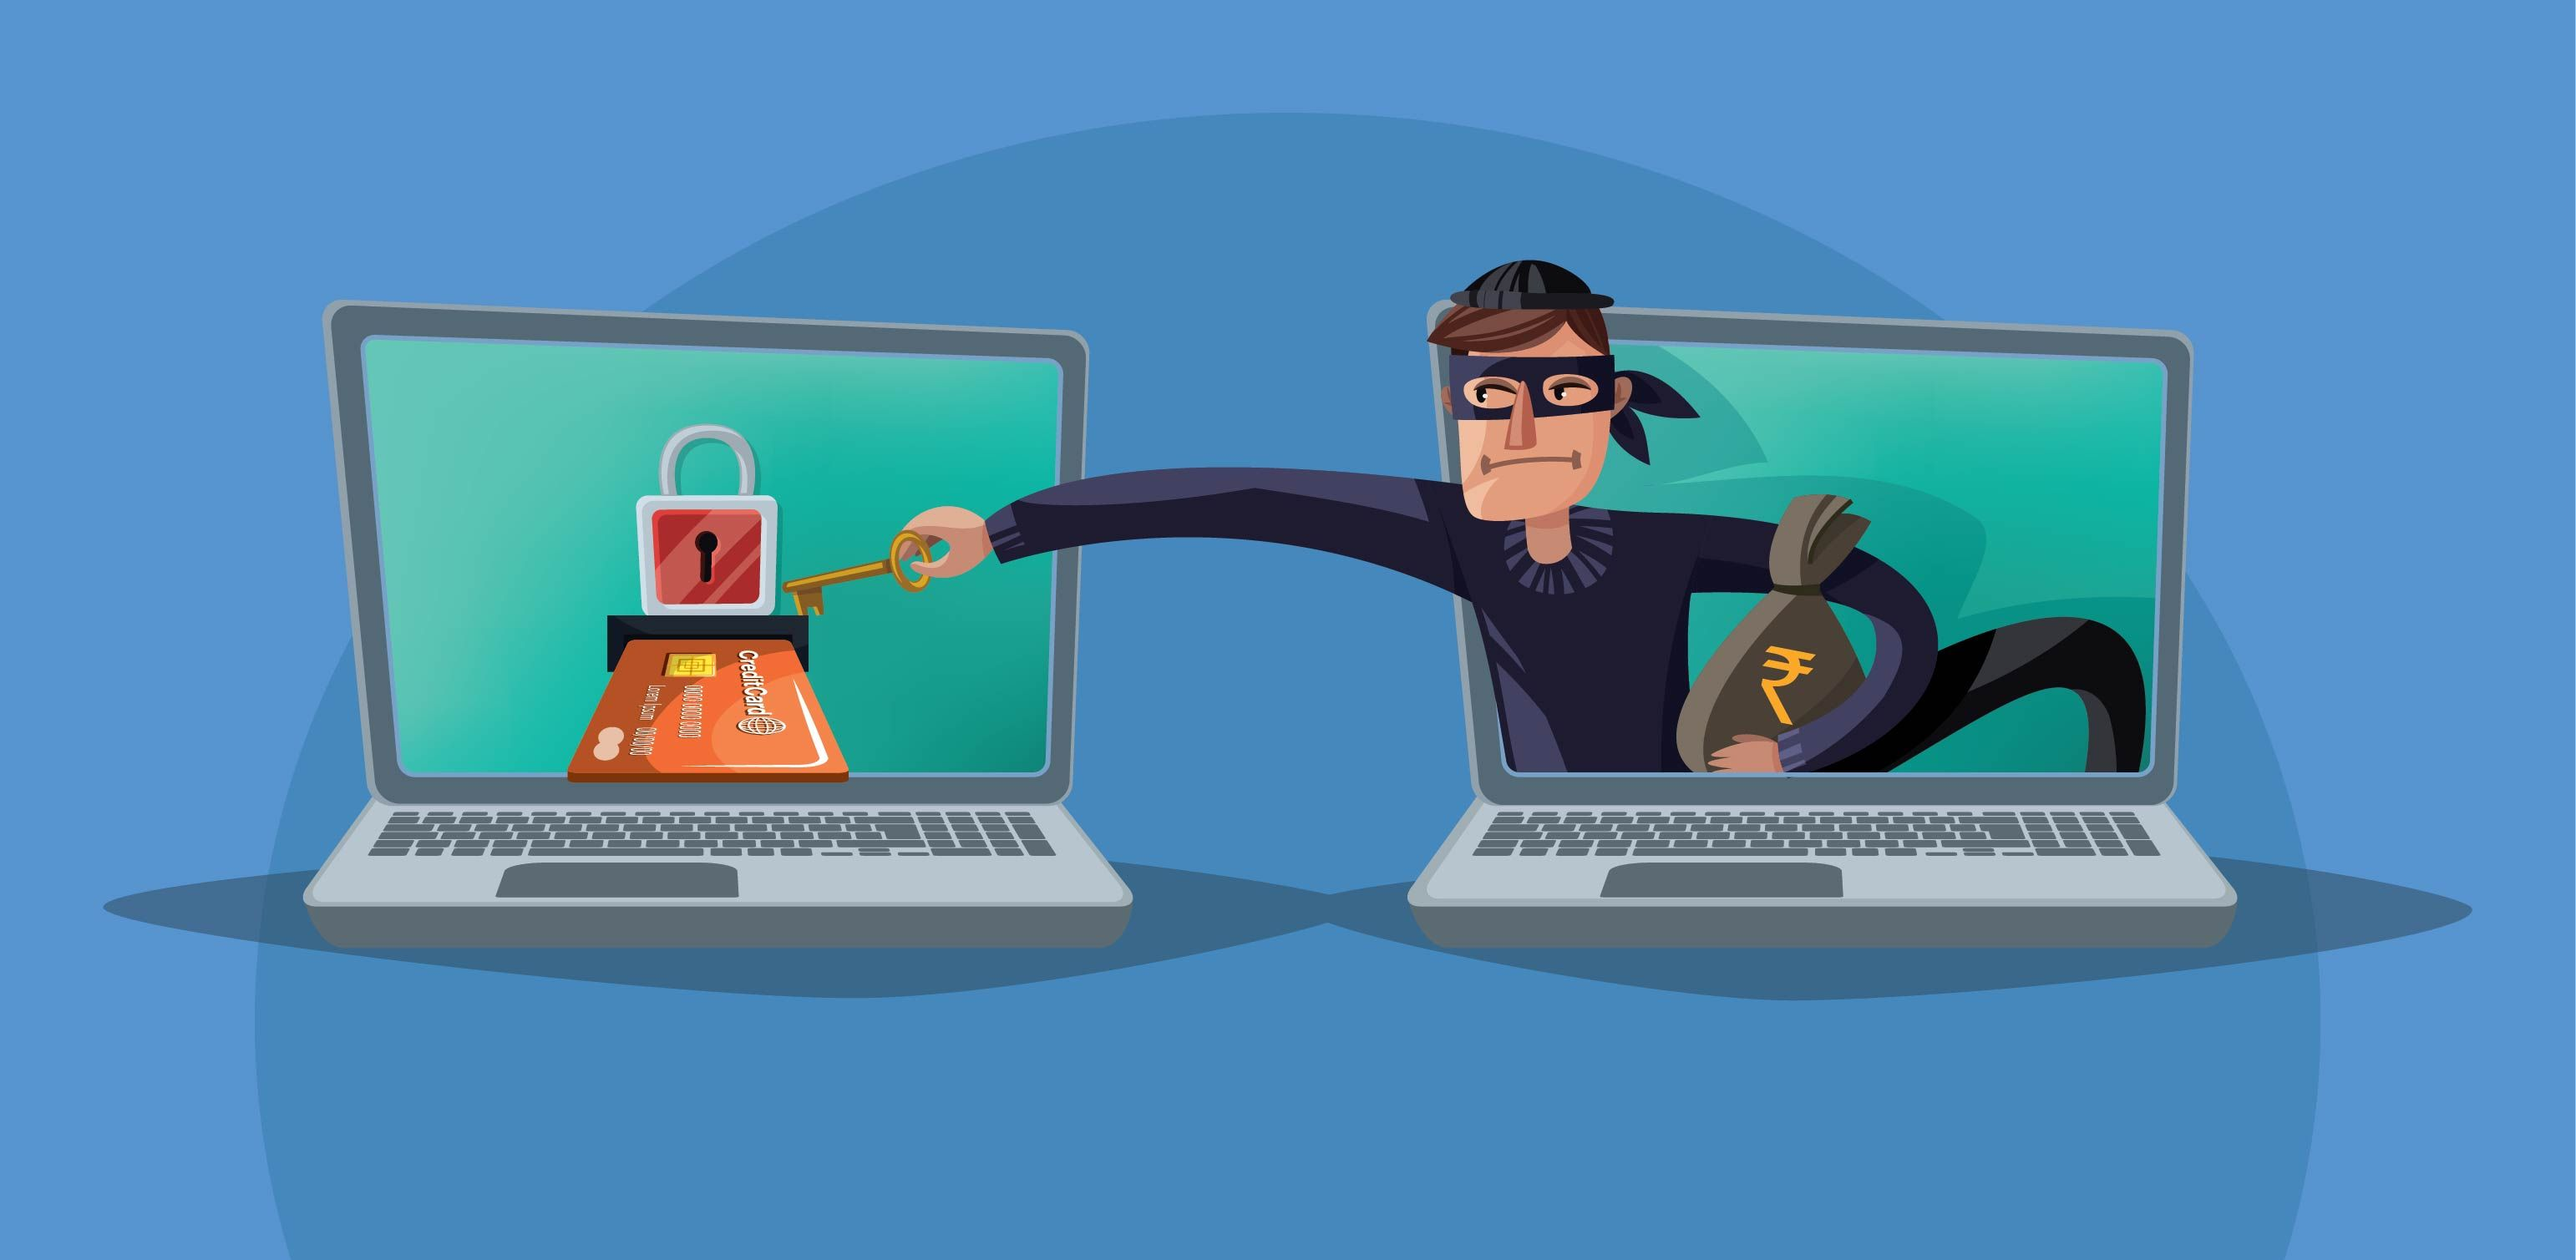
# **Data Description**
This dataset contains detailed information about online transactions, with each row representing an individual transaction. The attributes included in the dataset are as follows:

1. step:

 * Represents a unit of time in hours.
 * The dataset covers 30 days, with a total of 744 steps.

2. type:

 * Specifies the transaction type, which can be CASH-IN, CASH-OUT, DEBIT, PAYMENT, or TRANSFER.
  * Indicates the nature of the financial activity.

3. amount:

  * Indicates the monetary value of the transaction.
  * Represents the amount of money involved in the transaction.

4. nameOrg:

  * Identifies the customer who initiated the transaction.
  * Links each transaction to the account holder responsible for initiating it.

5. oldbalanceOrg:

  * Shows the initial account balance of the customer before the transaction.
  * Provides the starting financial position of the account holder.

6. newbalanceOrg:

  * Shows the new account balance of the customer after the transaction.
  * Reflects the updated financial status of the account holder following the transaction.

7. nameDest:

  * Identifies the recipient customer of the transaction.
  * Connects transactions to the account receiving the funds.

8. oldbalanceDest:

  * Indicates the initial account balance of the recipient before the *ion. There is no information for recipients starting with 'M' (Merchants).
  * Provides insight into the starting financial position of the recipient account.

9. newbalanceDest:

  * Indicates the new account balance of the recipient after the transaction. * no information for recipients starting with 'M' (Merchants).
  * Reflects the updated financial status of the recipient account following the transaction.

10. isFraud:

  * A binary indicator (0 or 1) that shows whether the transaction is fraudulent (0) or Not (1).
  * Identifies transactions that involve fraudulent activity within the simulation.

# Objective
The main aim of this analysis is to create a reliable classification model that can accurately determine if an online transaction is fraudulent. By utilizing the features in the dataset, the objective is to train a machine learning model that can effectively differentiate between legitimate and fraudulent transactions.

# Approach:
1. Exploratory Data Analysis (EDA):

   * EDA serves as a foundational step in data analysis, employing statistical and graphical techniques to delve into the dataset's attributes, uncovering its inherent characteristics, structure, and potential outliers.
   * Early implementation of EDA in data science or machine learning projects is crucial, facilitating the acquisition of valuable insights and providing direction for subsequent analysis steps.

2. Data Preprocessing:

  * Address missing or anomalous values in the dataset.
  * Encode categorical variables if necessary.
  * Scale numerical features to ensure they have a uniform impact on the model.

3. Handling Imbalance:

  * Apply techniques to address class imbalance, such as oversampling the minority class (fraudulent transactions) using methods like SMOTE or undersampling the majority class.

4. Model Selection:

  * Experiment with various classification algorithms, including Logistic Regression, Random Forest, XGBoost, etc.
  * Use appropriate evaluation metrics for imbalanced datasets, focusing on metrics like precision, recall, F1-score, and ROC-AUC.

5. Hyperparameter Tuning:

  * Perform a systematic search for optimal hyperparameters using techniques like GridSearchCV or RandomizedSearchCV to enhance model performance.

6. Model Evaluation:

  * Assess the performance of the trained model on a separate test dataset.
Evaluate the model's ability to accurately classify fraudulent transactions while minimizing false positives.

7. Deployment:
  * Deployed the model using Streamlit for an interactive web application.
  * Enabled real-time fraud detection through a user-friendly interface.









In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import iqr
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import confusion_matrix,classification_report,make_scorer,roc_curve,auc
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
sns.set(style="whitegrid")

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/payment_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307258 entries, 0 to 1307257
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1307258 non-null  int64  
 1   type            1307257 non-null  object 
 2   amount          1307257 non-null  float64
 3   nameOrig        1307257 non-null  object 
 4   oldbalanceOrg   1307257 non-null  float64
 5   newbalanceOrig  1307257 non-null  float64
 6   nameDest        1307257 non-null  object 
 7   oldbalanceDest  1307257 non-null  float64
 8   newbalanceDest  1307257 non-null  float64
 9   isFraud         1307257 non-null  float64
 10  isFlaggedFraud  1307257 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 109.7+ MB


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1307253,136,TRANSFER,426455.18,C379739604,0.0,0.00,C2142703715,705902.24,1132357.42,0.0,0.0
1307254,136,TRANSFER,464803.33,C1631993596,0.0,0.00,C1171040194,1011116.65,1475919.98,0.0,0.0
1307255,136,PAYMENT,15614.51,C1056703656,20063.0,4448.49,M915607287,0.00,0.00,0.0,0.0
1307256,136,PAYMENT,9973.69,C844867852,2693.0,0.00,M1648017509,0.00,0.00,0.0,0.0
1307257,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()

step              0
type              1
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.duplicated().sum()

0

In [ ]:
num_rows,num_columns = df.shape
print(f"Number of rows: {num_rows:,}")
print(f"Number of columns: {num_columns}")

Number of rows: 1,307,257
Number of columns: 11


In [ ]:
unique_types=df["type"].unique()
type_counts=df["type"].value_counts()

print(type_counts)

type
CASH_OUT    465011
PAYMENT     438881
CASH_IN     286079
TRANSFER    108499
DEBIT         8787
Name: count, dtype: int64


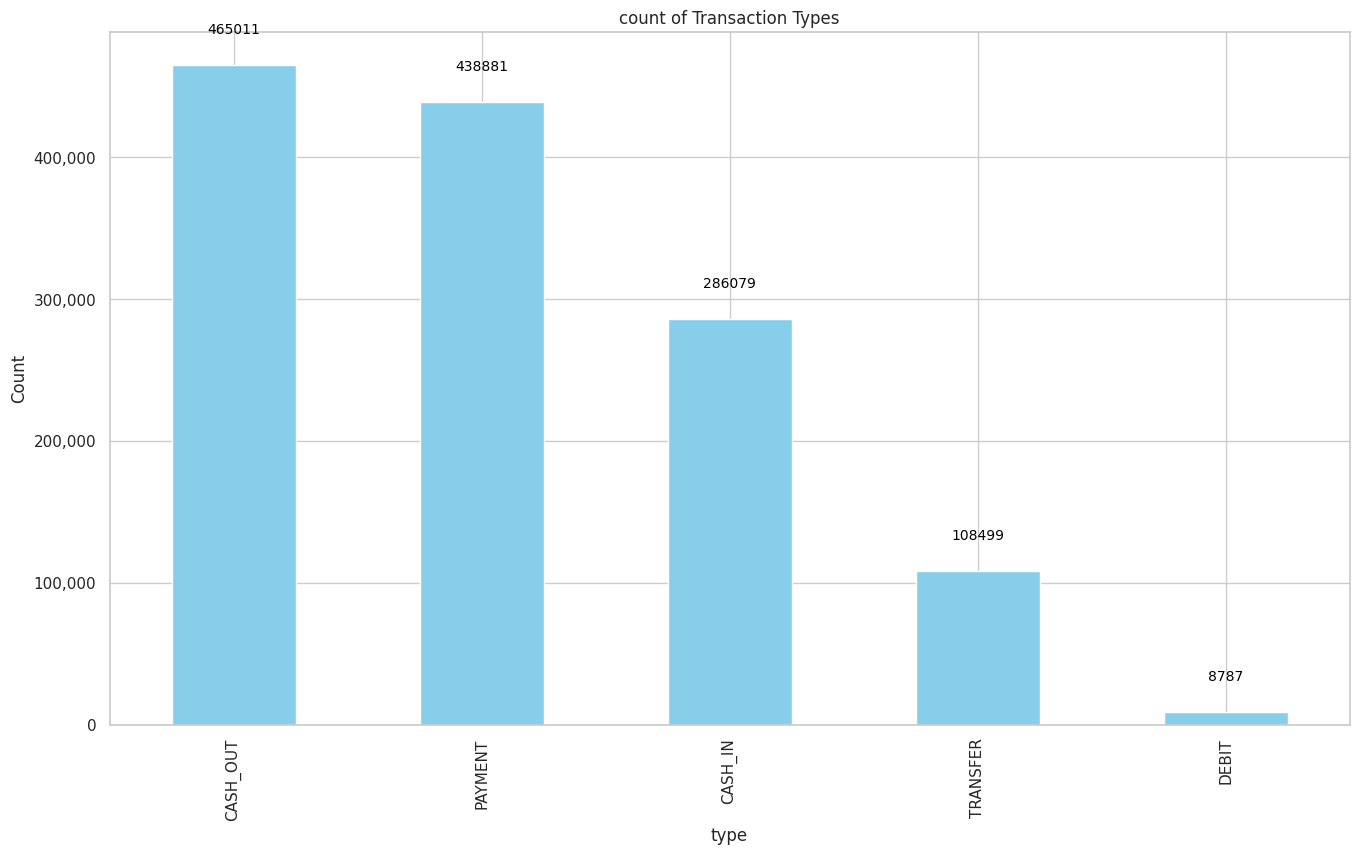

In [ ]:
plt.figure(figsize=(16,9))
plt.title('count of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
bars=type_counts.plot(kind='bar',color= 'skyblue')


for bar in bars.patches:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval +20000,yval,ha='center',va='bottom',fontsize=10,color='black')


plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value,_: f'{value:,.0f}'))
plt.show()


The majority of fraudulent transactions occurred within the 'CASH_OUT' and 'PAYMENT' transaction types, with 'CASH_IN' comprising approximately half of the 'PAYMENT', while 'TRANSFER' and 'DEBIT' transactions were less frequent compared to other transaction types.

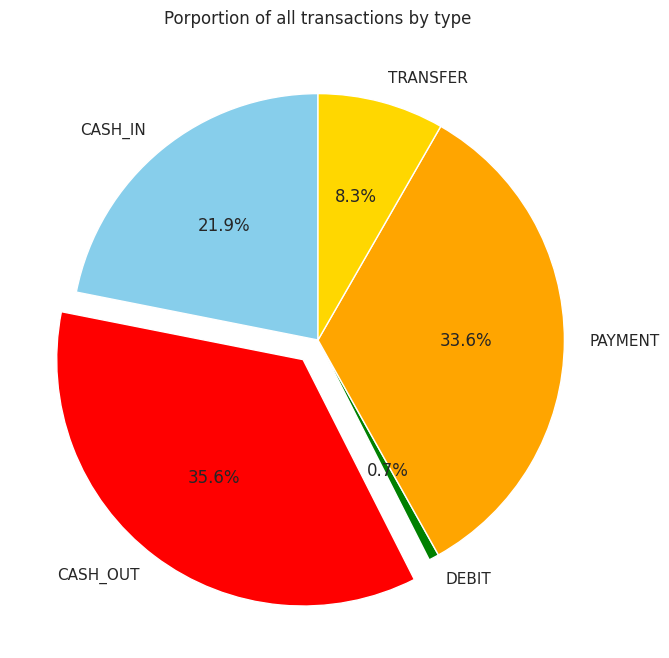

In [ ]:
all_counts_by_type =df.groupby("type").size()
plt.figure(figsize=(8,8))
plt.pie(all_counts_by_type, labels=all_counts_by_type.index, autopct='%1.1f%%',startangle=90,colors=['skyblue','red','green','orange','gold'],explode=(0,0.1,0,0,0))
plt.title('Porportion of all transactions by type')
plt.show()

The piechat shows the precentage(%) distributions of each transaction type.Here 'CASH_OUT','PAYMENT' and 'CASH_IN' account for more than 90% of the transactions. While 'DEBIT' AND 'TRANSFER' combines for traffic less than 10%.

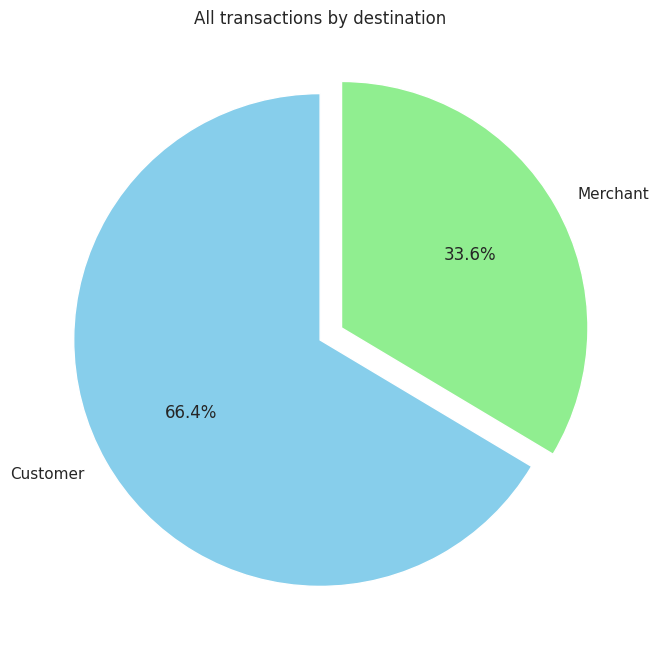

In [ ]:
df_copy =df.copy()
df_copy['nameDest_first_letter']=df_copy.nameDest.str[0]
df_copy['nameDest_first_letter']=df_copy.nameDest_first_letter.replace({'M':'Merchant','C':'Customer'})
all_by_dest=df_copy.groupby('nameDest_first_letter').size()

plt.figure(figsize=(8,8))
plt.pie(all_by_dest, labels=all_by_dest.index, autopct='%1.1f%%',startangle=90, colors=['skyblue','lightgreen'],explode=(0,0.1))
plt.title('All transactions by destination')
plt.show()

The first letter from 'nameDest' feature, the first letter is extracted to create a column named 'nameDest_first_letter' which signifies that destination transaction by 'C' for customer and 'M' for merchant.The pie-chart shows the distribution of destination tansactions.

In [ ]:
fraud_count=df[df.isFraud==1].shape[0]
non_fraud_count=df[df.isFraud==0].shape[0]

print(f"Count of fraud transactions :{f'{fraud_count:,.0f}'}")

print(f"Count of non-fraud transactions :{f'{non_fraud_count:,.0f}'}")

Count of fraud transactions :1,548
Count of non-fraud transactions :1,305,709


In [ ]:
total_transactions= fraud_count + non_fraud_count
fraud_percentage=(fraud_count/total_transactions) *100
non_fraud_percentage=(non_fraud_count/total_transactions) *100

print(f'Fraud transaction percentage: {fraud_percentage}')
print(f'Non-fraud transaction percentage: {non_fraud_percentage}')

Fraud transaction percentage: 0.11841588914804052
Non-fraud transaction percentage: 99.88158411085196


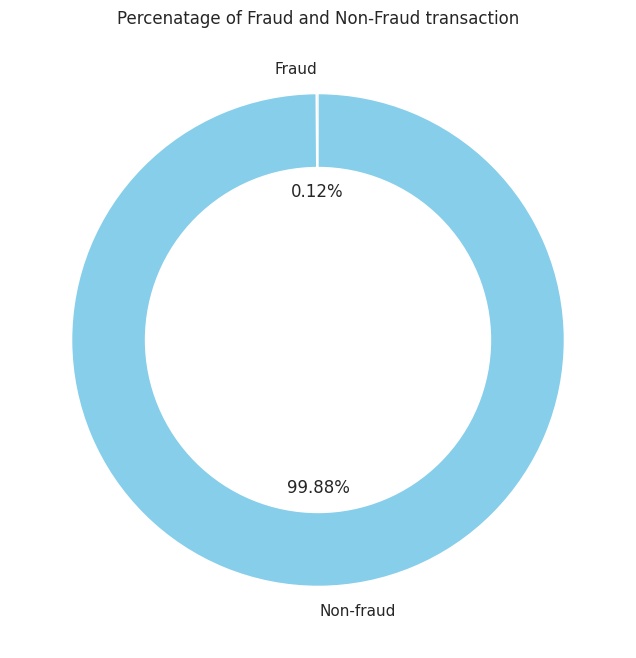

In [ ]:
labels= ['Fraud','Non-fraud']
sizes= [fraud_percentage, non_fraud_percentage]
colors= ['orange','skyblue']

fig, ax =plt.subplots(figsize=(8,8))
ax.pie(sizes,labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)

center_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

plt.title('Percenatage of Fraud and Non-Fraud transaction')
plt.show()

type
CASH_OUT    781
TRANSFER    767
dtype: int64


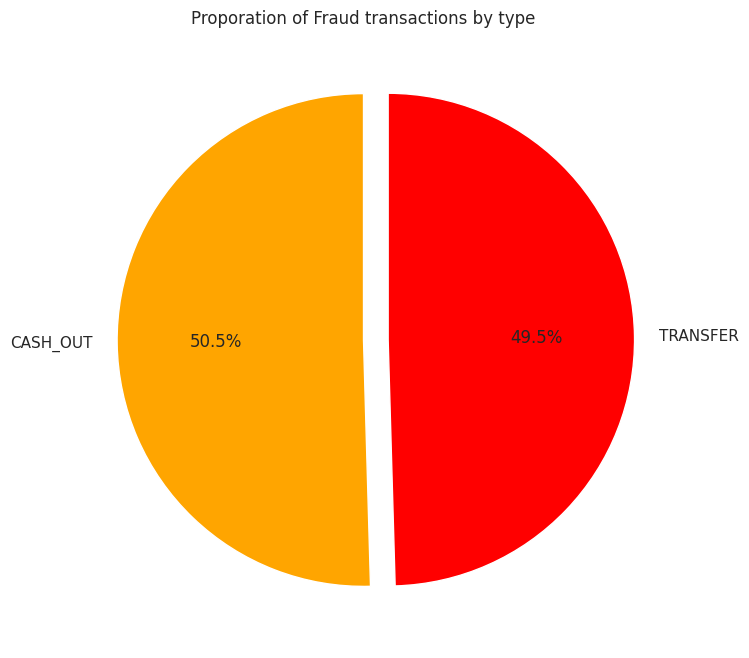

In [ ]:
fraud_transaction =df[df['isFraud'] == 1 ]
fraud_count_by_type = fraud_transaction.groupby('type').size()
print(fraud_count_by_type)

plt.figure(figsize=(8,8))
plt.pie(fraud_count_by_type, labels= fraud_count_by_type.index,autopct='%1.1f%%',startangle=90, colors=['orange','red'] ,explode=(0,0.1))
plt.title('Proporation of Fraud transactions by type')
plt.show()

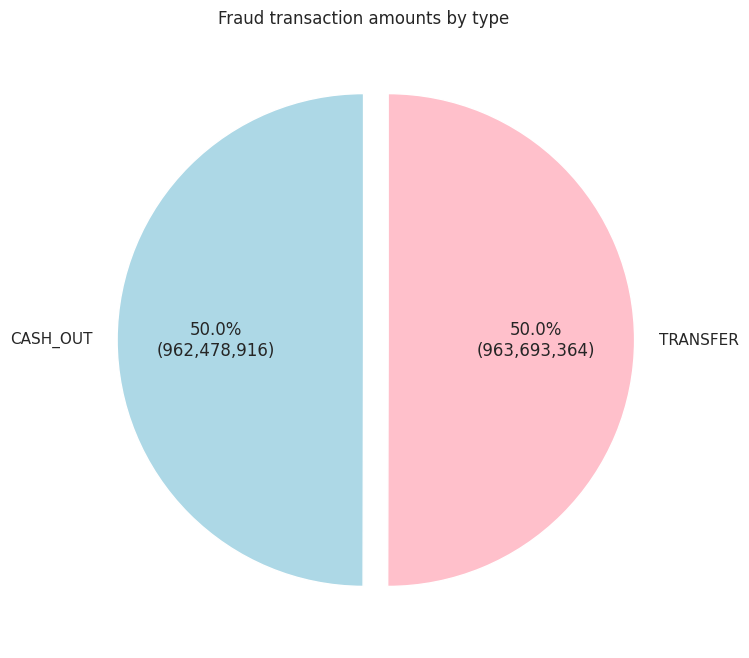

In [ ]:
fraud_amts_by_type = df[df.isFraud==1].groupby("type")["amount"].sum()
plt.figure(figsize=(8,8))
plt.pie(fraud_amts_by_type, labels=fraud_amts_by_type.index,autopct= lambda p: f'{p:.1f}%\n({p * sum(fraud_amts_by_type)/100:,.0f})',startangle=90,colors=['lightblue','pink'],explode=(0,0.1))
plt.title('Fraud transaction amounts by type')
plt.show()

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


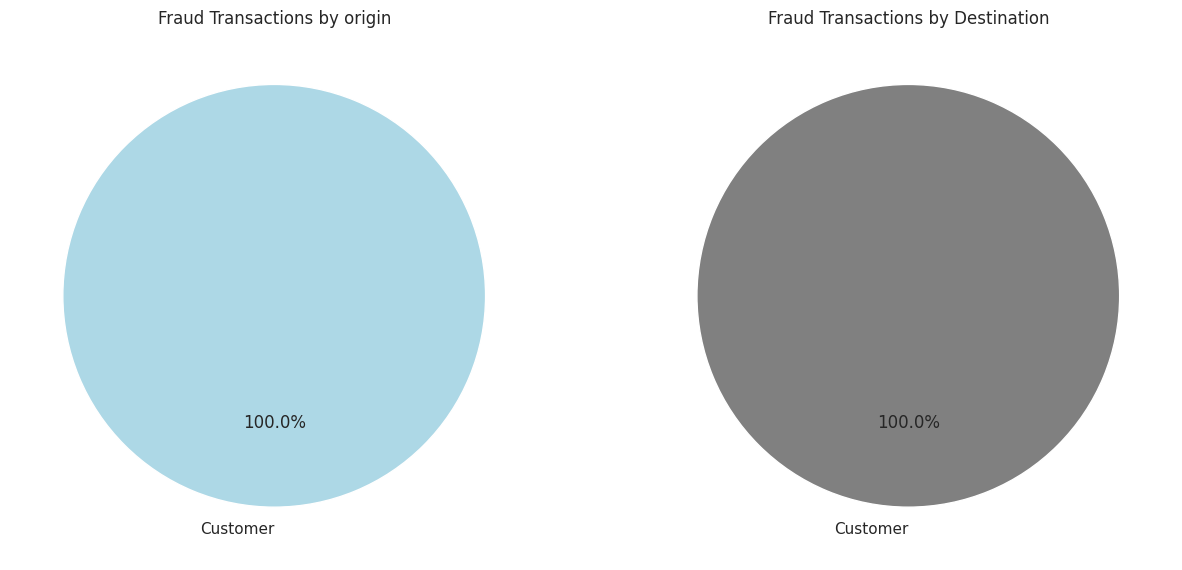

In [ ]:
fraud_transactions = df[df['isFraud']==1].copy()
fraud_transactions['nameOrig_first_letter'] = fraud_transactions['nameOrig'].str[0]
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest'].str[0]
fraud_transactions['nameOrig_first_letter'] = fraud_transactions['nameOrig_first_letter'].replace('C','Customer')
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest_first_letter'].replace('C','Customer')
fraud_by_name_Orig = fraud_transactions.groupby('nameOrig_first_letter').size()
fraud_by_name_Dest = fraud_transactions.groupby('nameDest_first_letter').size()

fig, axes =plt.subplots(nrows=1,ncols=2,figsize=(15,8))
axes[0].pie(fraud_by_name_Orig,labels=fraud_by_name_Orig.index, autopct='%1.1f%%', startangle=90, colors=['lightblue'])
axes[0].set_title('Fraud Transactions by origin')

axes[1].pie(fraud_by_name_Dest,labels=fraud_by_name_Dest.index, autopct='%1.1f%%', startangle=90, colors=['gray'])
axes[1].set_title('Fraud Transactions by Destination')

plt.show()

Here the fraudlent transaction is taken between customers

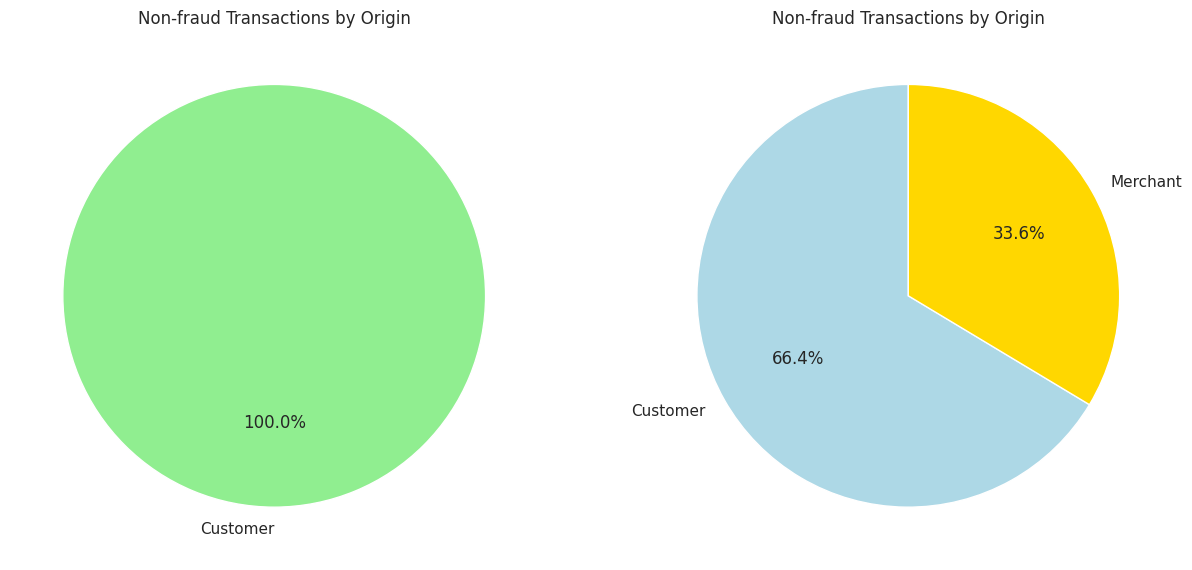

In [ ]:
nonfraud_transactions=df[df['isFraud']==0].copy()
nonfraud_transactions['name_Orig_first_letter']=nonfraud_transactions['nameOrig'].str[0]
nonfraud_transactions['name_Dest_first_letter']=nonfraud_transactions['nameDest'].str[0]
nonfraud_transactions['name_Dest_first_letter'].replace({'C':"Customer",'M':'Merchant'},inplace=True)
nonfraud_transactions['name_Orig_first_letter'].replace({'C':"Customer"},inplace=True)
nonfraud_by_name_orig=nonfraud_transactions.groupby('name_Orig_first_letter').size()
nonfraud_by_name_Dest=nonfraud_transactions.groupby('name_Dest_first_letter').size()

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
axes[0].pie(nonfraud_by_name_orig,labels=nonfraud_by_name_orig.index,autopct='%1.1f%%',startangle=90,colors=['lightgreen'])
axes[0].set_title('Non-fraud Transactions by Origin')

axes[1].pie(nonfraud_by_name_Dest,labels=nonfraud_by_name_Dest.index,autopct='%1.1f%%',startangle=90,colors=['lightblue','gold'])
axes[1].set_title('Non-fraud Transactions by Origin')

plt.show()

In [ ]:
pd.set_option('display.float_format','{:,.2f}'.format)
df[df['isFraud']==0].amount.describe()

count   1,305,709.00
mean      161,946.70
std       261,165.31
min             0.10
25%        12,881.44
50%        78,661.33
75%       218,745.63
max     6,419,835.27
Name: amount, dtype: float64

In [ ]:
df[df['isFraud']==1].amount.describe()

count        1,548.00
mean     1,244,297.34
std      2,055,966.17
min            119.00
25%         99,630.24
50%        378,688.65
75%      1,399,119.04
max     10,000,000.00
Name: amount, dtype: float64

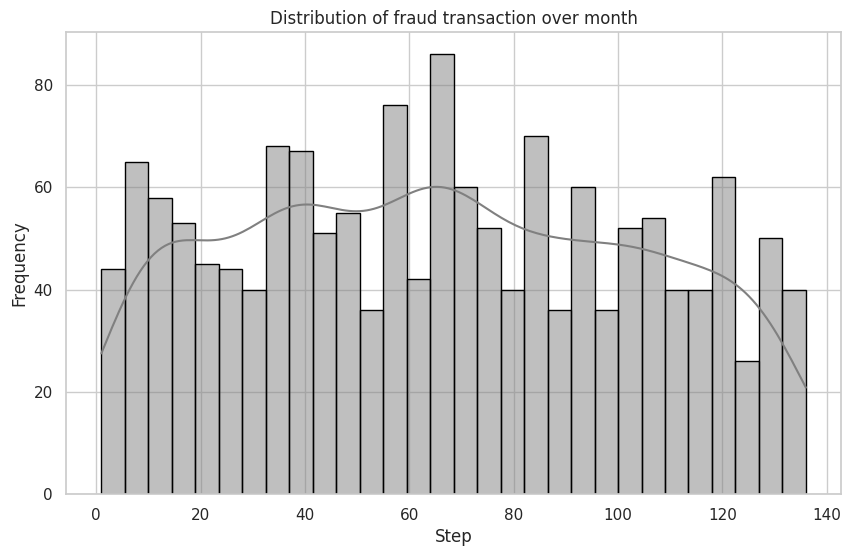

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(fraud_transactions["step"], bins=30,kde=30, color='gray',edgecolor='black')
plt.title('Distribution of fraud transaction over month')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

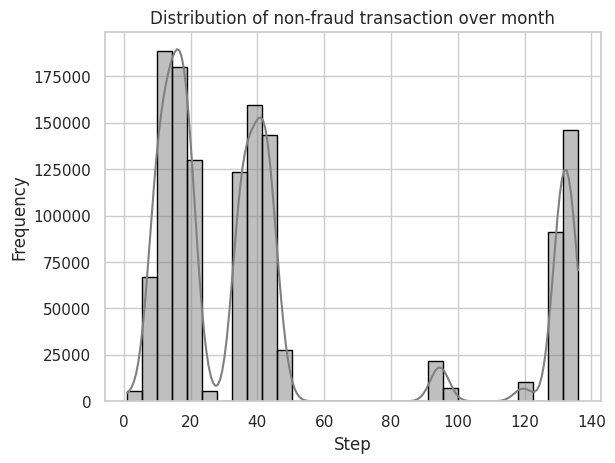

In [ ]:
sns.histplot(nonfraud_transactions["step"], bins=30,kde=30, color='gray',edgecolor='black')
plt.title('Distribution of non-fraud transaction over month')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

In [ ]:
fraud_transactions


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_first_letter,nameDest_first_letter
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.00,0.00,Customer,Customer
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1.00,0.00,Customer,Customer
251,1,TRANSFER,"2,806.00",C1420196421,"2,806.00",0.00,C972765878,0.00,0.00,1.00,0.00,Customer,Customer
252,1,CASH_OUT,"2,806.00",C2101527076,"2,806.00",0.00,C1007251739,"26,202.00",0.00,1.00,0.00,Customer,Customer
680,1,TRANSFER,"20,128.00",C137533655,"20,128.00",0.00,C1848415041,0.00,0.00,1.00,0.00,Customer,Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291695,135,CASH_OUT,"128,417.96",C1400591529,"128,417.96",0.00,C1469656123,"99,429.91","227,847.87",1.00,0.00,Customer,Customer
1291987,135,TRANSFER,"7,927.06",C3592918,"7,927.06",0.00,C956442492,0.00,0.00,1.00,0.00,Customer,Customer
1291988,135,CASH_OUT,"7,927.06",C2071408487,"7,927.06",0.00,C1313763244,0.00,"7,927.06",1.00,0.00,Customer,Customer
1293870,136,TRANSFER,"3,263,443.15",C1406501579,"3,263,443.15",0.00,C106008304,0.00,0.00,1.00,0.00,Customer,Customer


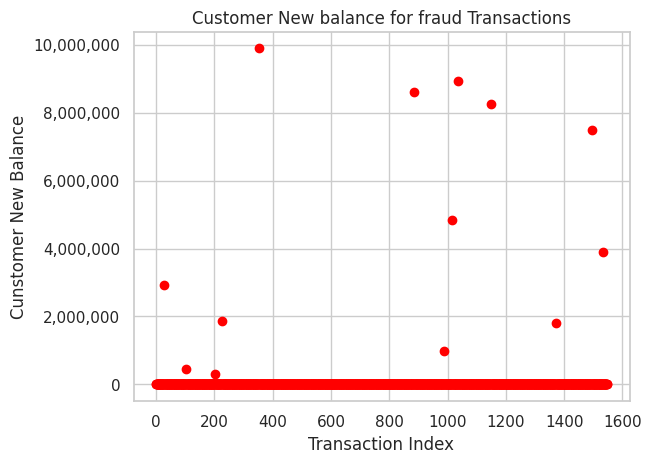

In [ ]:
plt.scatter(range(len(fraud_transactions)), fraud_transactions['newbalanceOrig'],color='red')
plt.title('Customer New balance for fraud Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Cunstomer New Balance')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{value:,.0f}'))
plt.show()

In [ ]:
transaction_corr_df=df.drop(columns=['type','nameOrig','nameDest'])

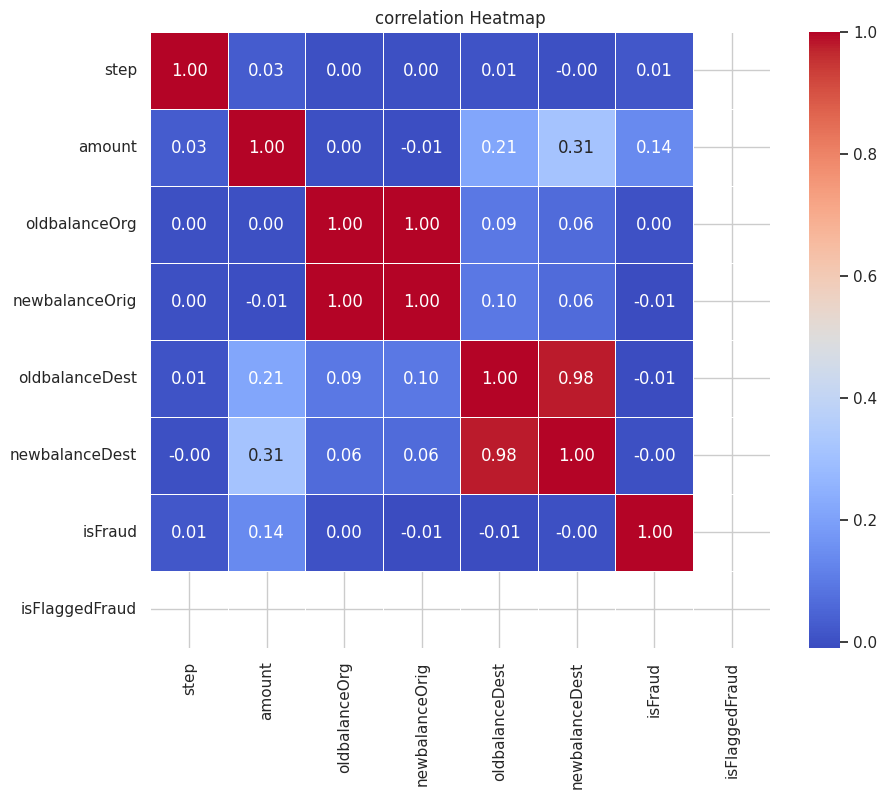

In [ ]:
corr_matrix=transaction_corr_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Project/Fraud_payment_Data_analysis (1).ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Project/Fraud_payment_Data_analysis (1).ipynb to html
[NbConvertApp] Writing 1507244 bytes to /content/drive/MyDrive/Project/Fraud_payment_Data_analysis (1).html
